Netflix is a popular streaming service that offers a vast catalog of movies, TV shows, and original contents.
This dataset is a cleaned version of the original version which can be found here. The data consist of contents added to Netflix from 2008 to 2021.


## <b>In this  project, you are required to do </b>

1. Treat the Nulls
2. Treat the duplicates
3. Populate missing rows
4. Drop unneeded columns
5. Split columns
Extra steps and more explanation on the process will be explained through the
code comments

# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. country : Country where the movie / show was produced

6. date_added : Date it was added on Netflix

7. release_year : Actual Releaseyear of the movie / show

8. rating : TV Rating of the movie / show

9. duration : Total Duration - in minutes or number of seasons

10. listed_in : Genere

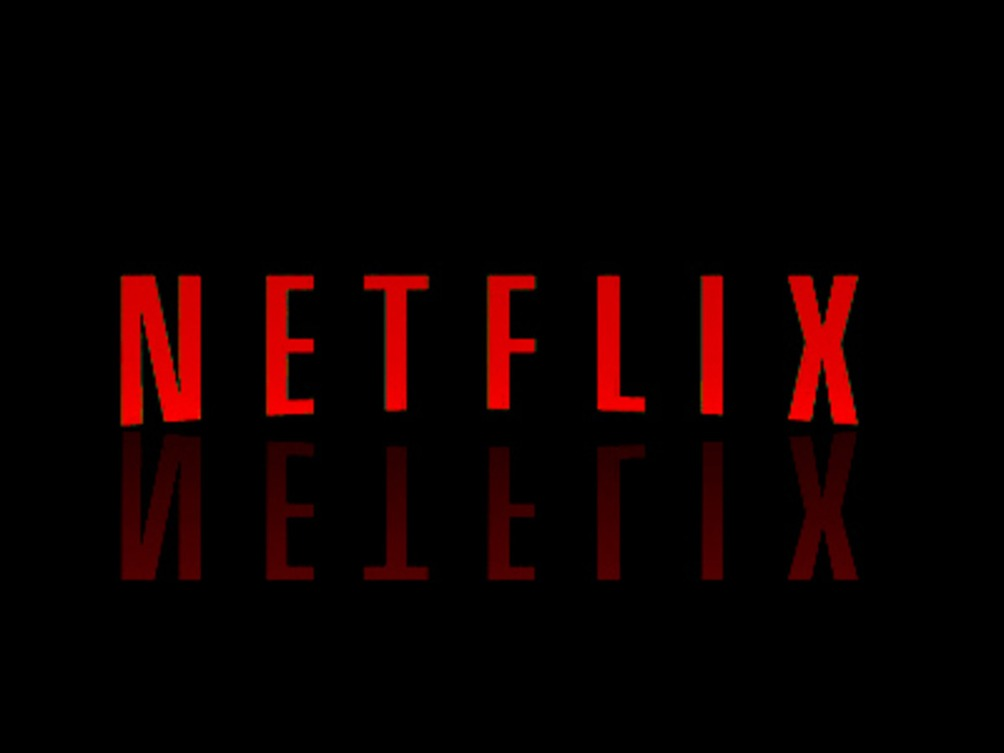

###Import Library and Dataset CSV file


In [ ]:
#Import imprtant library for using analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
#Import Data set
data = pd.read_csv("/content/drive/MyDrive/Unified mentor /Netflix Data Cleaning Analysis/netflix1.csv")

In [ ]:
# display data
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [ ]:
# here we showing about all data type.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


We are currently showing the date_added type as an object, but it needs to be in datetime format.

In [ ]:
# Convert the date_added column to datetime format.
data['date_added'] = pd.to_datetime(data['date_added'])

In [ ]:
# Now showing data after convert datetime format.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   country       8790 non-null   object        
 5   date_added    8790 non-null   datetime64[ns]
 6   release_year  8790 non-null   int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   listed_in     8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 686.8+ KB


In [ ]:
# Check missing value in dataset
data.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
country,0
date_added,0
release_year,0
rating,0
duration,0
listed_in,0


In [ ]:
# Remove all duplicate values from the dataset, if any exist.
data.drop_duplicates(inplace=True)

In [ ]:
# Drop rows with missing critical information
data.dropna(subset=['director', 'title', 'country'], inplace=True)

In [ ]:
# Count the number movies and TV show
count_type = data['type'].value_counts()
print(count_type)

type
Movie      6126
TV Show    2664
Name: count, dtype: int64


## Exploratory data analysis

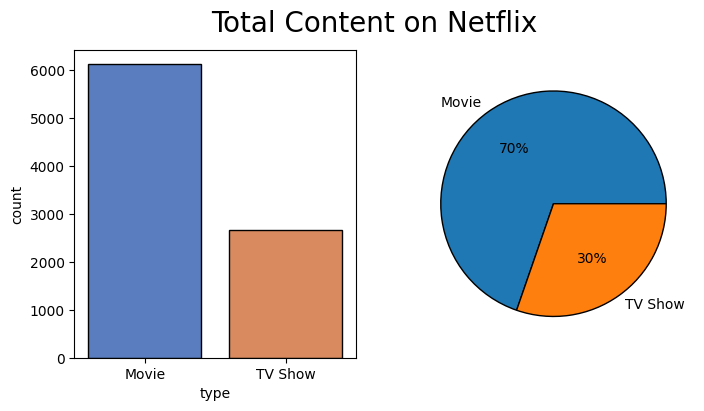

In [ ]:
# Showing Total Content of Netflix help of chart
freq=data['type'].value_counts()
fig, axes=plt.subplots(1,2, figsize=(8, 4))
sns.countplot(data, x=data['type'], hue = data['type'], edgecolor= 'k', linewidth=1, ax=axes[0], palette = 'muted', legend=False)
plt.pie(freq, labels=['Movie', 'TV Show'], autopct='%.0f%%' , textprops = {'fontsize':10}
        ,wedgeprops = {'linewidth':1,'width':1,'edgecolor':'k'})
plt.suptitle('Total Content on Netflix', fontsize=20)
plt.show()

In [ ]:
# Split the 'listed_in' column and count genres
data['genres'] = data['listed_in'].apply(lambda x: x.split(',')) #

In [ ]:
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,genres
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,[Documentaries]
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...","[Crime TV Shows, International TV Shows, TV ..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries","[TV Dramas, TV Horror, TV Mysteries]"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies","[Children & Family Movies, Comedies]"
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","[Dramas, Independent Movies, International M..."


In [ ]:
# All Genres Count
all_genres = sum(data['genres'], [])
genres_count = pd.Series(all_genres).value_counts().head()
print(genres_count)

 International Movies    2624
Dramas                   1599
Comedies                 1210
Action & Adventure        859
Documentaries             829
Name: count, dtype: int64


<ipython-input-58-d98ad4a63f25>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genres_count.index, y=genres_count.values, width = 0.5, edgecolor =  'k', linewidth = 1, palette='Set1')


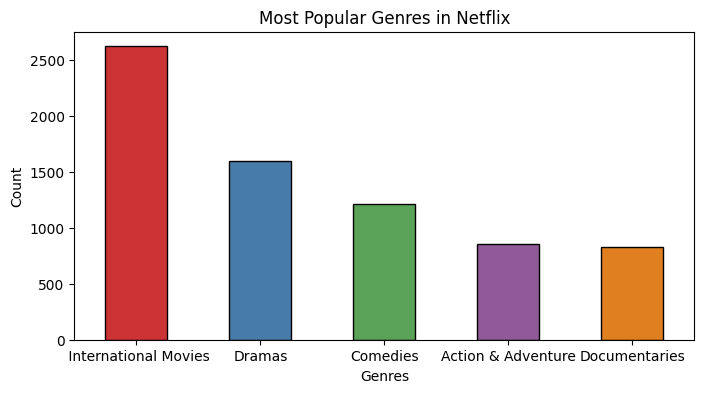

In [ ]:
# Find Most Popular Genres in Netflix
plt.figure(figsize=(8,4))
sns.barplot(x=genres_count.index, y=genres_count.values, width = 0.5, edgecolor =  'k', linewidth = 1, palette='Set1')
plt.title("Most Popular Genres in Netflix")
plt.xlabel("Genres")
plt.ylabel("Count")
plt.show()

According to this bar plot, International Movies is the most popular genre on Netflix, followed by Dramas as the second most popular genre.

In [ ]:
#Extract year and month from 'date_added
data['year_added'] = data['date_added'].dt.year
data['month_added'] = data['date_added'].dt.month

Text(0, 0.5, 'Count')

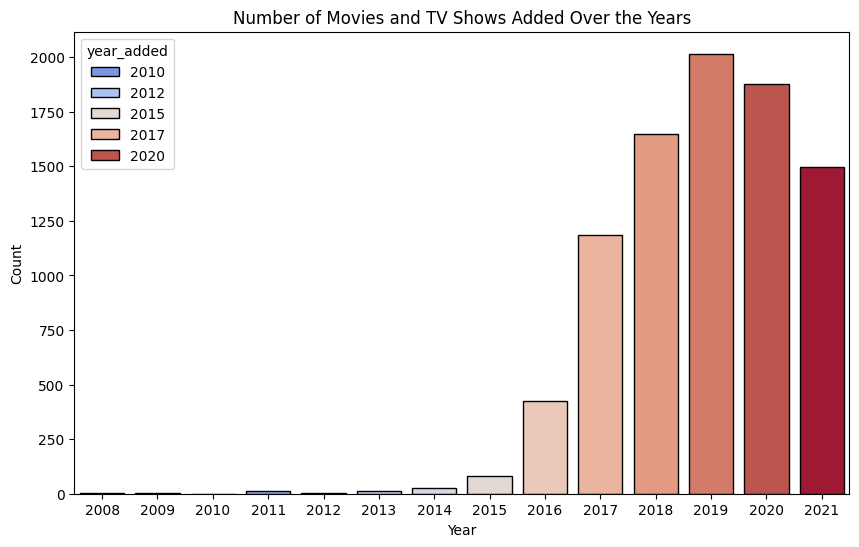

In [ ]:
# Released Number of Movie and TV show yearly.
plt.figure(figsize=(10,6))
sns.countplot(x = 'year_added', data = data, edgecolor =  'k', hue= 'year_added', linewidth = 1, palette = 'coolwarm')
plt.title("Number of Movies and TV Shows Added Over the Years")
plt.xlabel("Year")
plt.ylabel("Count")

This chart illustrates the number of Movies and TV Shows added to Netflix each year. Starting around 2015, there was a noticeable increase in content additions, which continued to rise sharply until 2019, the year with the highest number of new titles. After 2019, there was a slight decrease, but the number of additions in 2020 and 2021 remained significantly higher compared to earlier years. This trend suggests that Netflix focused on expanding its content library substantially in the past five years.

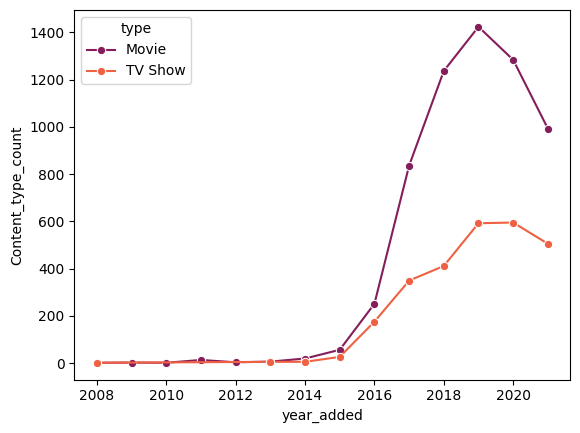

In [ ]:
# content type vs year when data was added to netflix
df_netflix = pd.DataFrame(netflix.groupby(['year_added','type'])['type'].count())
df_netflix.rename(columns = {'year_added':'count_of_movies_and_tv_shows', 'type':'Content_type_count'}, inplace =True)
df_netflix.reset_index()
sns.lineplot(x='year_added', y='Content_type_count', data=df_netflix, hue='type', palette='rocket',marker='o')
plt.show()

Since 2010, number of TV Shows are increasing we observed in scatter plot

In [ ]:
# Count titles by director
director_counts = data['director'].value_counts().head(11)

In [ ]:
print(director_counts)

director
Not Given                 2588
Rajiv Chilaka               20
Alastair Fothergill         18
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Martin Scorsese             12
Youssef Chahine             12
Jay Chapman                 12
Name: count, dtype: int64


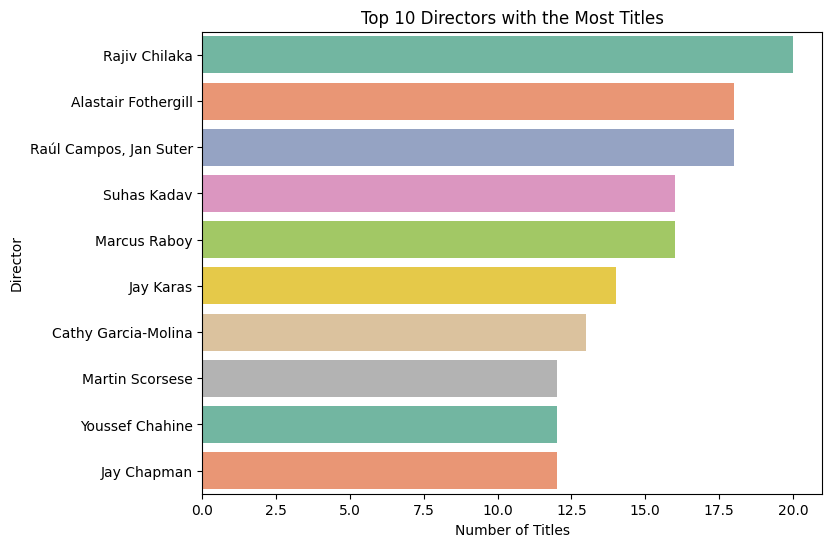

In [ ]:
# Find top 10 directors with the Most Titles.
plt.figure(figsize=(8, 6))
sns.barplot(x=director_counts[1:].values, y=director_counts[1:].index, palette='Set2', hue=director_counts[1:].index)
plt.tight_layout
plt.title('Top 10 Directors with the Most Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()

In this chart, we find the top 10 directors on Netflix based on data. (Not givan director names of 2,588 are not included in this chart).

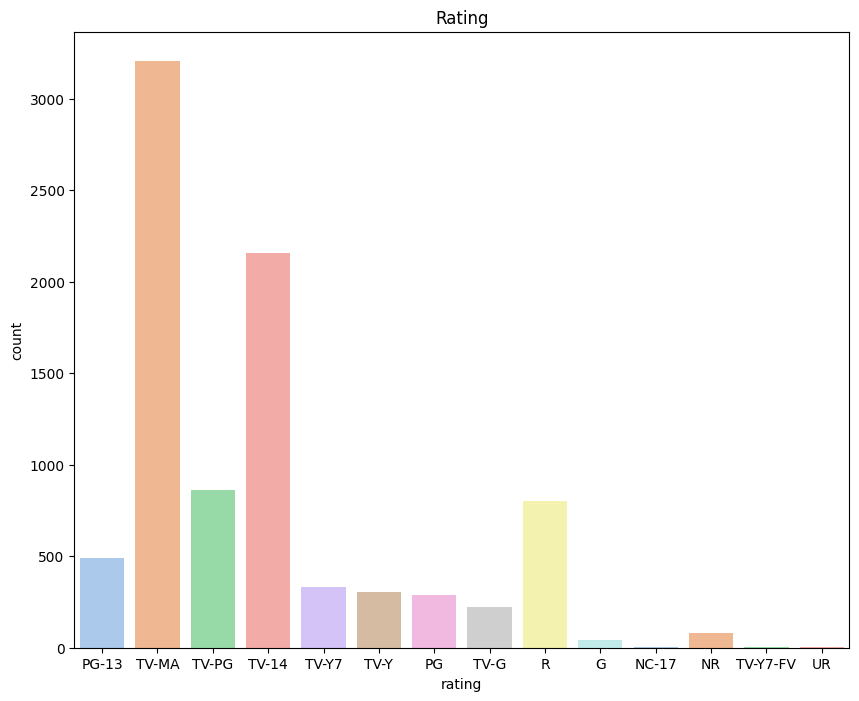

In [ ]:
# Rating related analysis.
sns.countplot(x='rating', data=data, palette='pastel', hue = 'rating')
fig= plt.gcf()
fig.set_size_inches(10,8)
plt.title('Rating')
plt.show()

<Axes: xlabel='rating'>

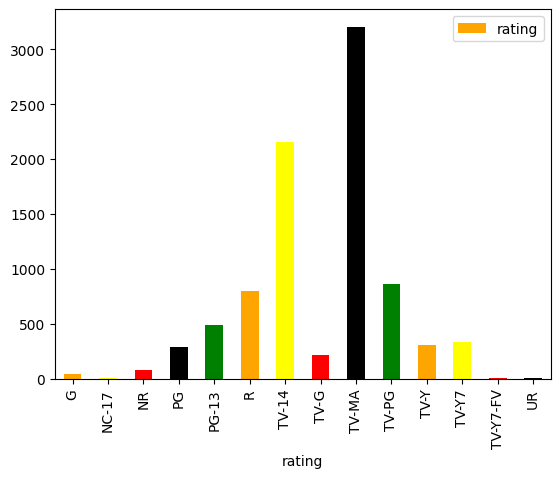

In [ ]:
# Visualization of content rating
data.groupby('rating')['rating'].count().plot(kind='bar', legend=True, color=['orange','yellow','red','black','green'])

Visualization  of content Rating

### Analyzing data according to countries.

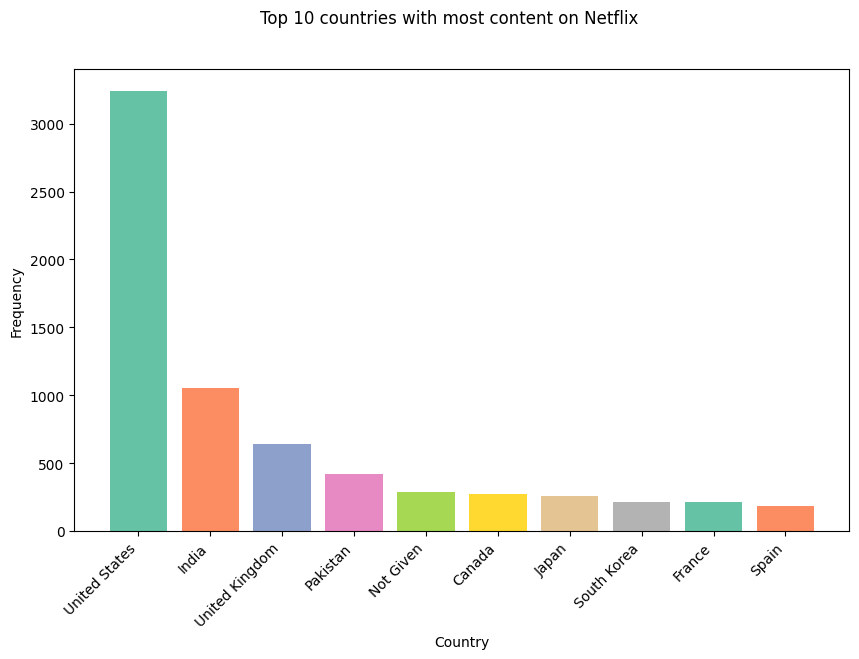

In [ ]:
# Top 10 countries with most content on Netflix
top_ten_countries=data['country'].value_counts().reset_index().sort_values(by='count', ascending=False)[:10]
plt.figure(figsize=(10, 6))
colors = sns.color_palette('Set2', n_colors=len(top_ten_countries))
plt.bar(top_ten_countries['country'], top_ten_countries['count'], color = colors)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Country")
plt.ylabel("Frequency")
plt.suptitle("Top 10 countries with most content on Netflix")
plt.show()

In [ ]:
netflix = data.copy()

In [ ]:
netflix['Season_wise_content'] = netflix['duration'].apply(lambda x: 'yes' if 'Season' in x else 'no')

In [ ]:
netflix['country'].head(6)

,country
0,United States
1,France
2,United States
3,Brazil
4,United States
5,United Kingdom


<Axes: xlabel='type', ylabel='Country_UK'>

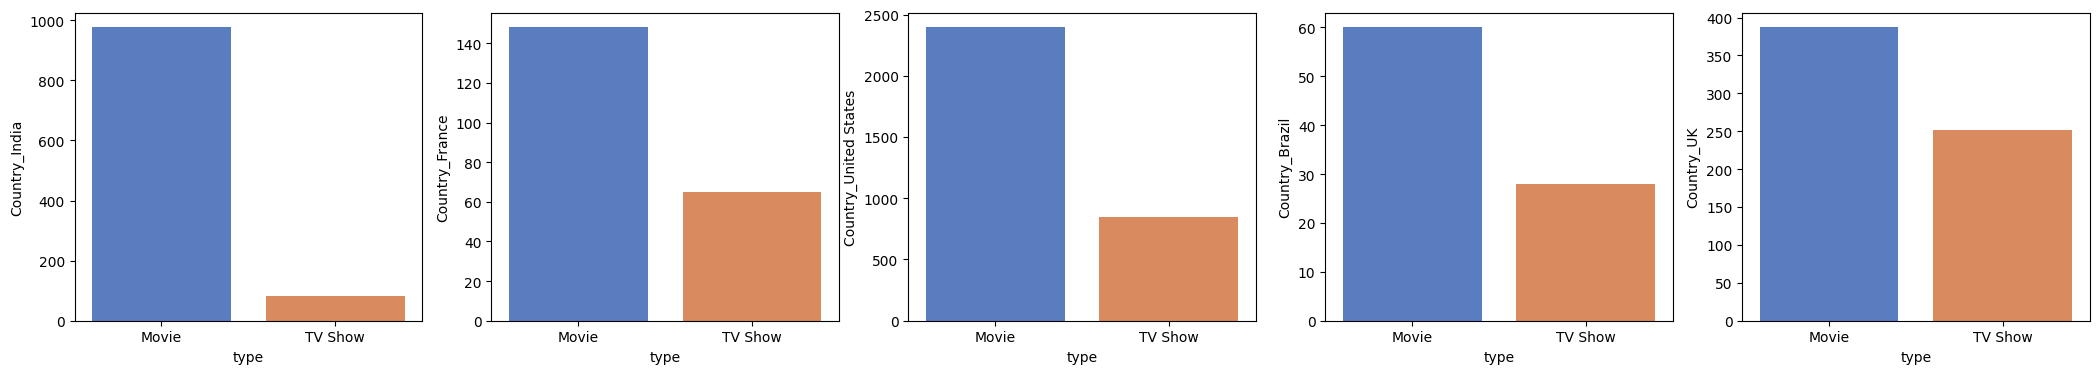

In [ ]:
fig, ax = plt.subplots(1,5, figsize=(26,4))
indian_content = netflix[netflix['country'].str.contains('India')]
indian_content =pd.DataFrame(indian_content.groupby('type')['country'].count()).reset_index()
indian_content.rename(columns ={'country':'Country_India'},inplace =True)
sns.barplot(x='type',y= 'Country_India',data=indian_content,ax=ax[0], palette='muted', hue = 'type')

france_content = netflix[netflix['country'].str.contains('France')]
france_content = pd.DataFrame(france_content.groupby('type')['country'].count()).reset_index()
france_content.rename(columns ={'country':'Country_France'}, inplace =True)
sns.barplot(x= 'type', y='Country_France', data=france_content, ax=ax[1], palette='muted', hue = 'type')

USA_content = netflix[netflix['country'].str.contains('United States')]
USA_content = pd.DataFrame(USA_content.groupby('type')['country'].count()).reset_index()
USA_content.rename(columns ={'country':'Country_United States'}, inplace =True)
sns.barplot(x= 'type', y='Country_United States', data=USA_content, ax=ax[2], palette='muted', hue = 'type')

brazil_content = netflix[netflix['country'].str.contains('Brazil')]
brazil_content = pd.DataFrame(brazil_content.groupby('type')['country'].count()).reset_index()
brazil_content.rename(columns ={'country':'Country_Brazil'}, inplace = True)
sns.barplot(x= 'type', y='Country_Brazil', data=brazil_content, ax=ax[3], palette='muted', hue = 'type')

UK_content = netflix[netflix['country'].str.contains('United Kingdom')]
UK_content = pd.DataFrame(UK_content.groupby('type')['country'].count()).reset_index()
UK_content.rename(columns= {'country':'Country_UK'}, inplace =True)
sns.barplot(x='type', y='Country_UK', ax=ax[4], data=UK_content, palette='muted', hue = 'type')

According to the above chart, movie content is the most in-demand across all countries

In [ ]:
# Analyzing Most popular Genre in Contry.
def genre_country(country_name):
  df = netflix[netflix['country'].str.contains(country_name)]
  l1={}
  for ele in df['listed_in']:
    for el in ele.split(','):
      if el in l1.keys():
        l1[el]= l1[el] + 1
      else:
        l1[el] = 1
  l1 = dict(Counter(l1).most_common(5))
  plt.bar(range(len(l1)), list(l1.values()), align='center', color=['skyblue', 'yellow', 'green', 'black', 'cyan'])
  plt.xticks(range(len(l1)), list(l1.keys()),rotation = 'vertical')
  plt.title("Most popular Genres for "+country_name)
  plt.show()


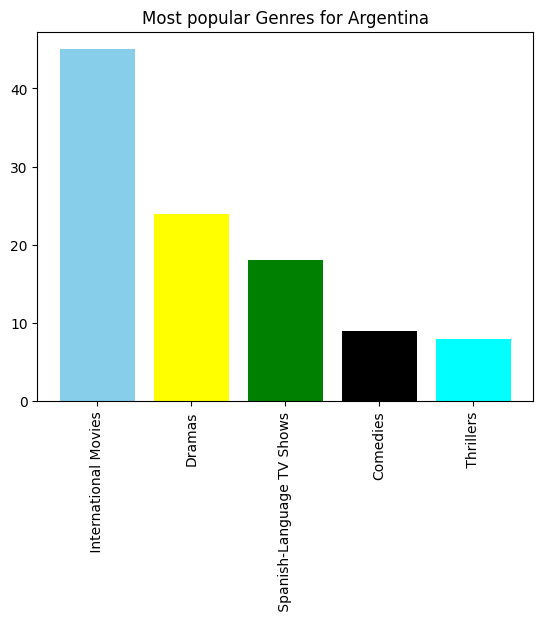

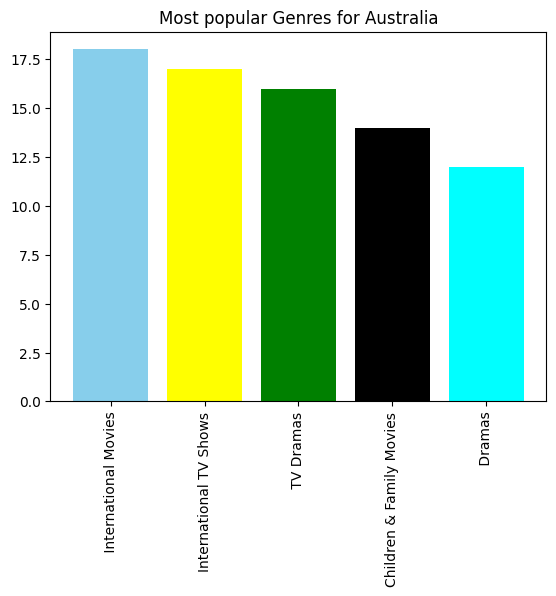

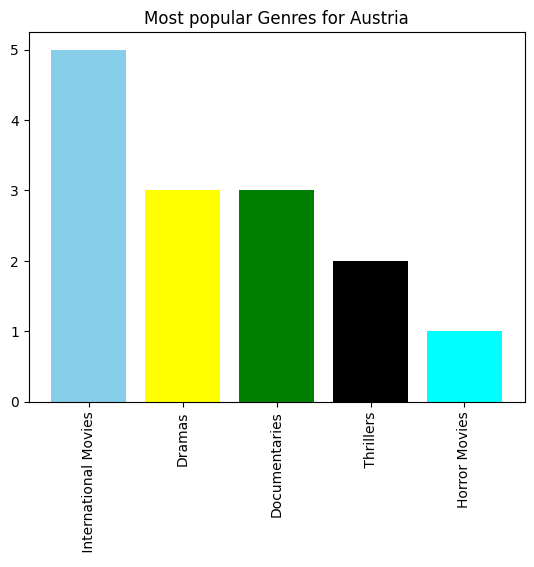

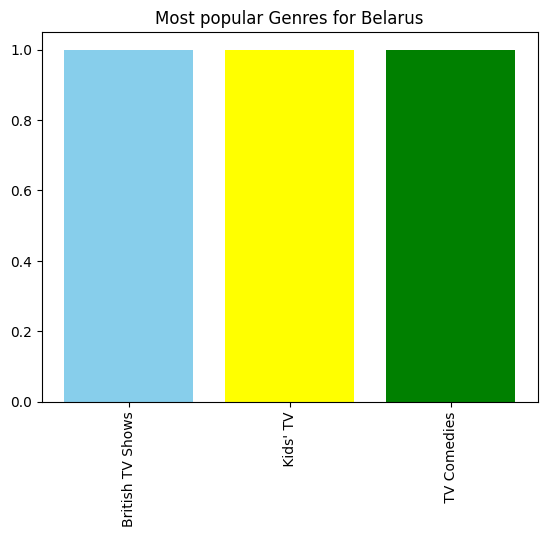

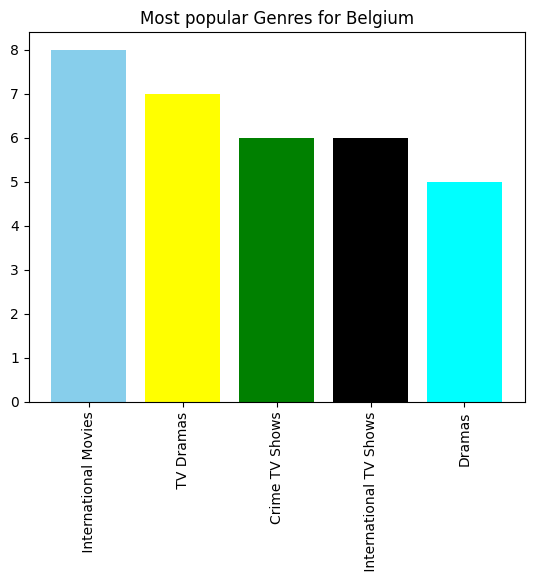

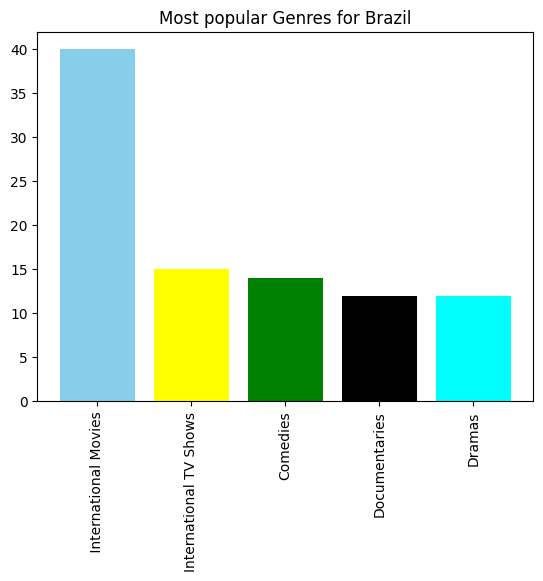

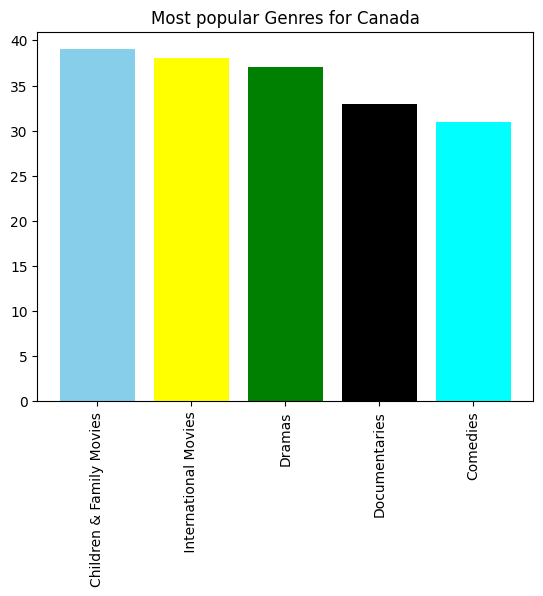

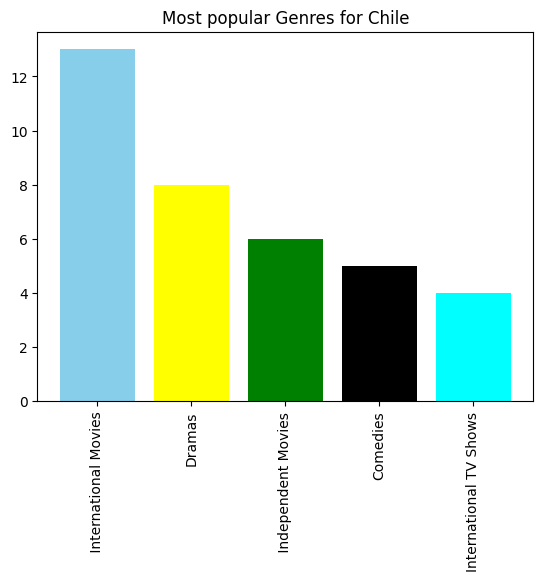

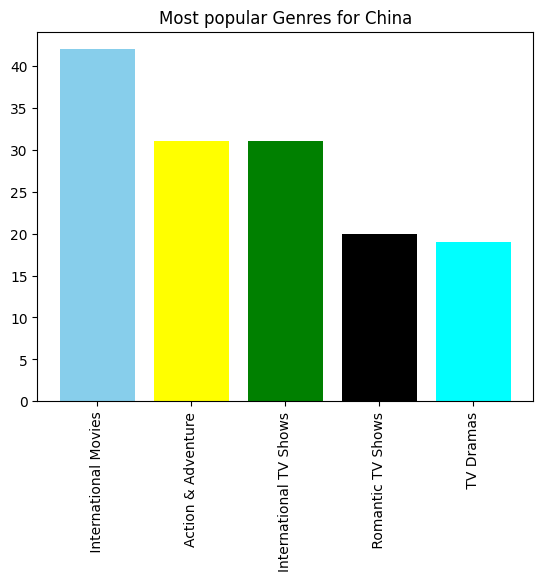

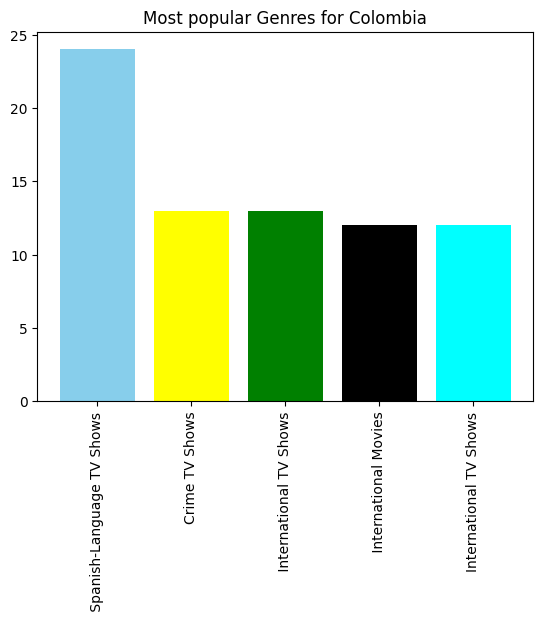

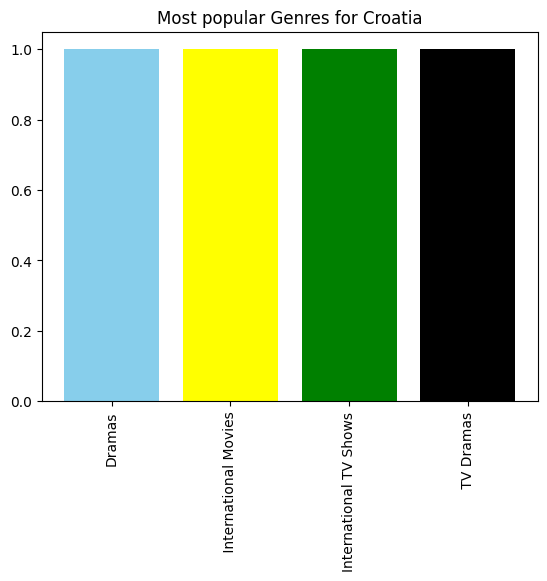

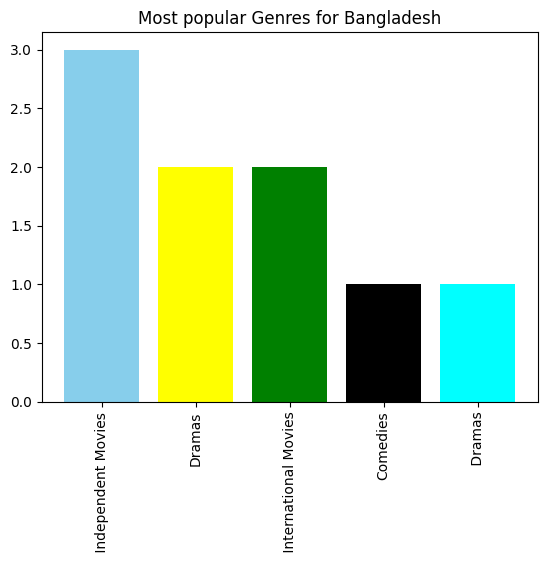

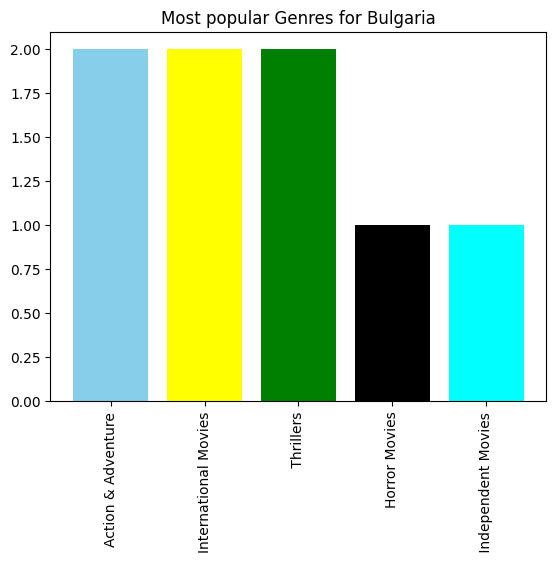

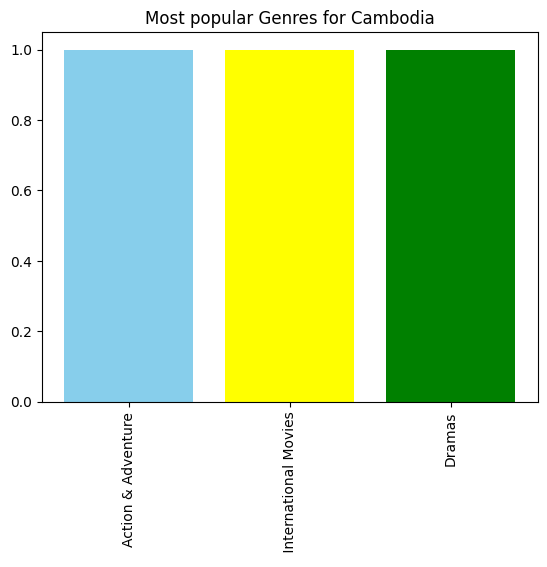

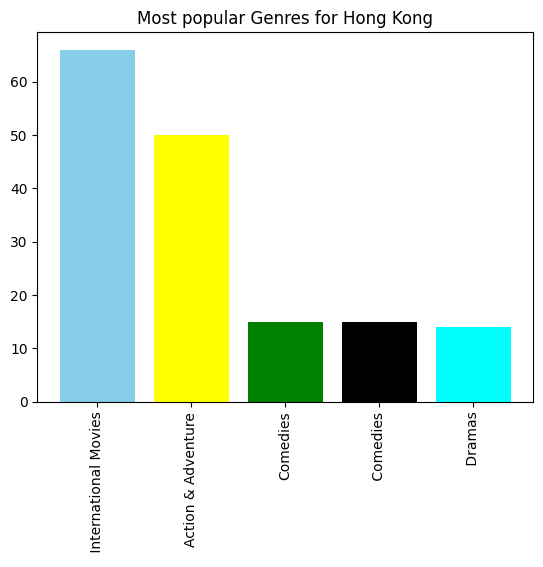

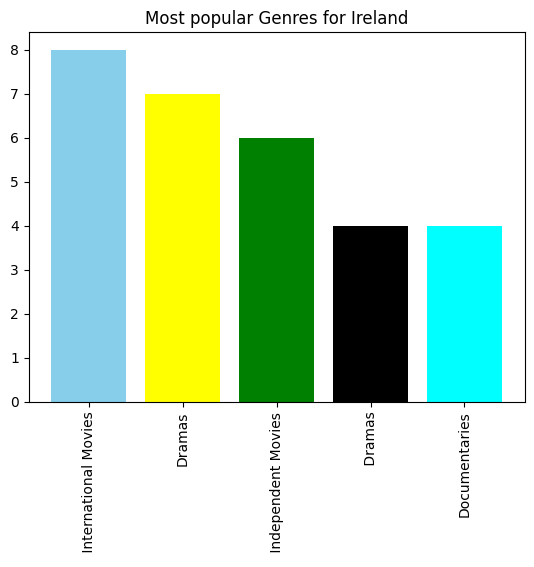

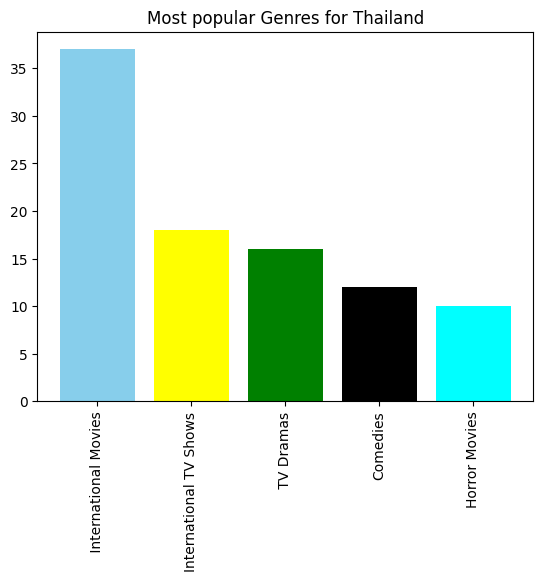

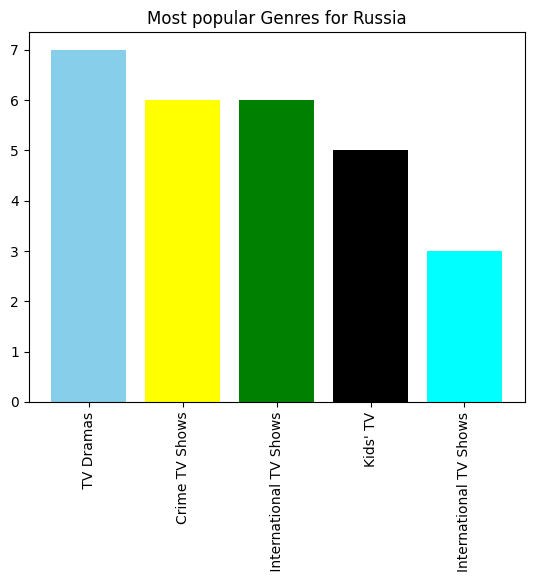

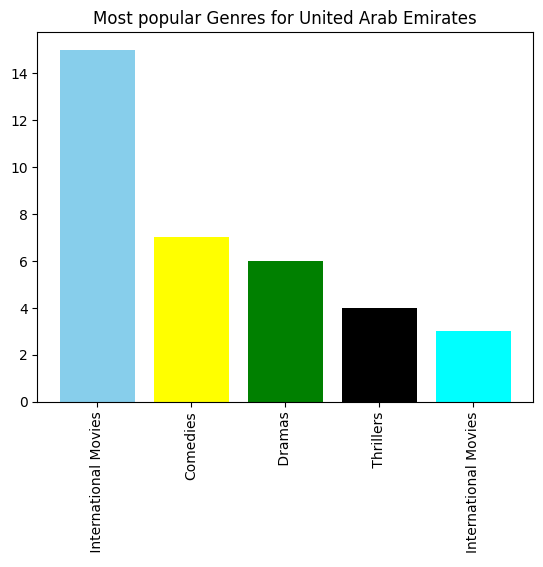

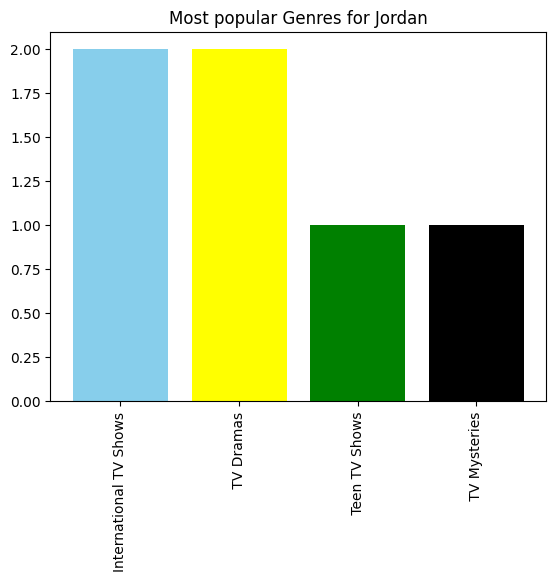

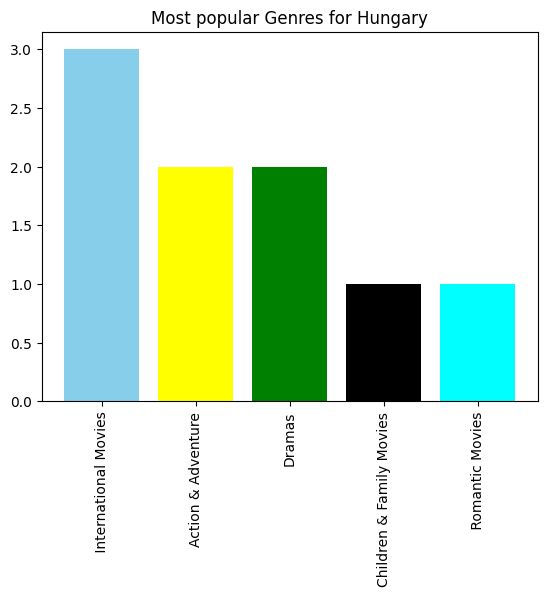

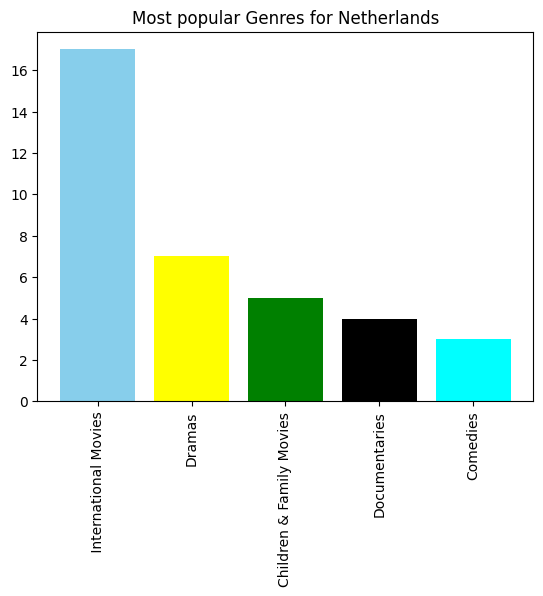

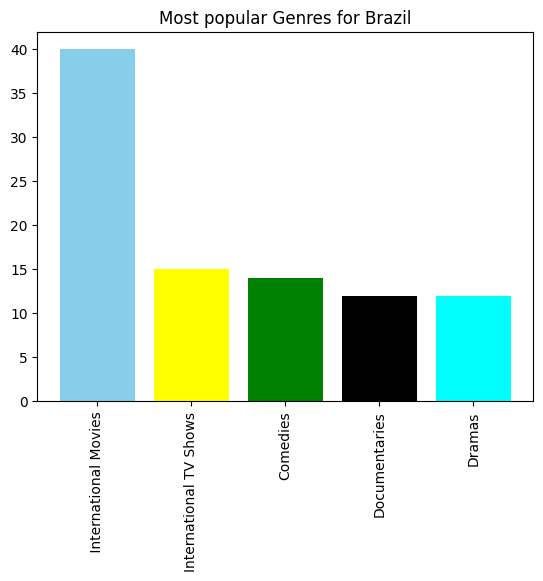

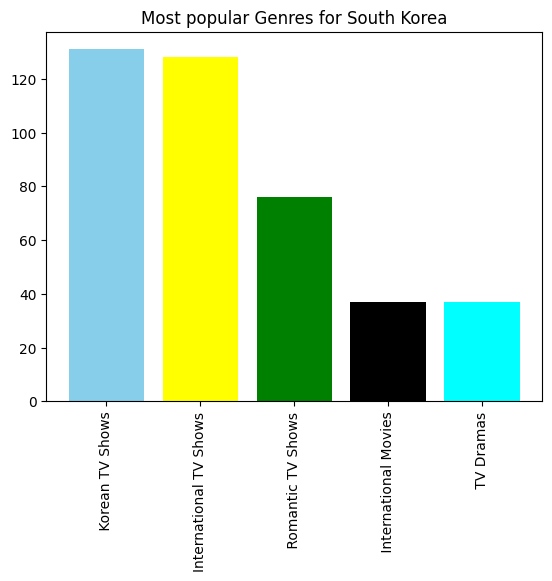

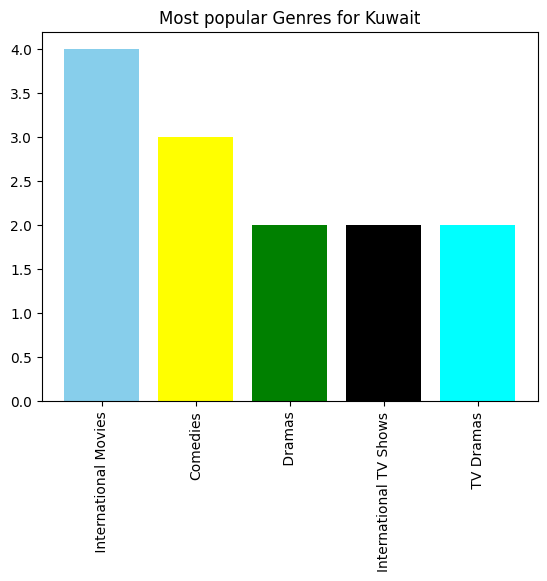

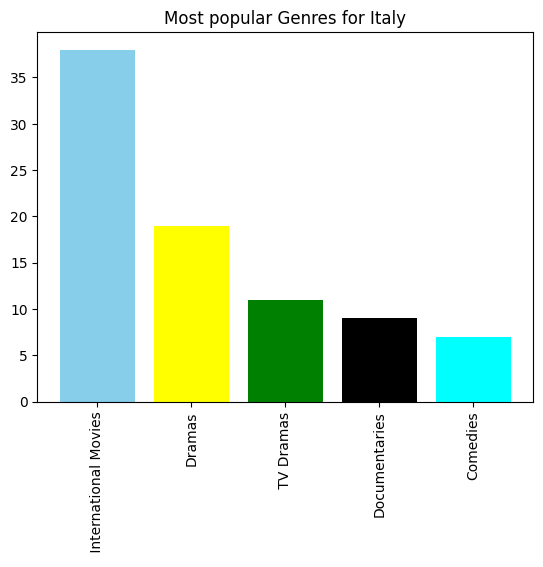

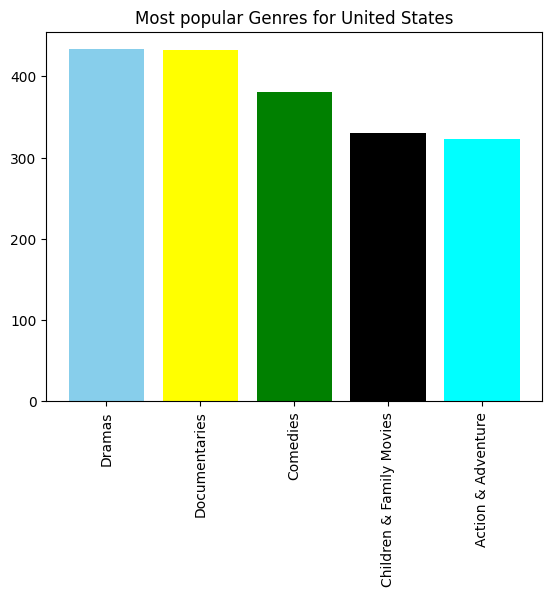

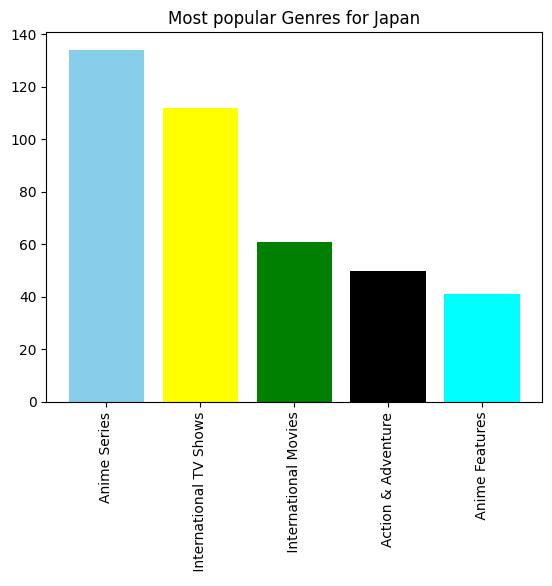

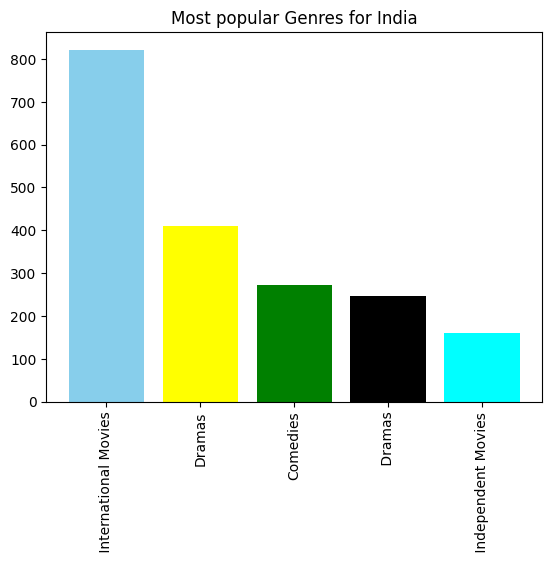

In [ ]:
from collections import Counter
countries = ['Argentina', 'Australia', 'Austria', 'Belarus', 'Belgium', 'Brazil', 'Canada', 'Chile', 'China',
             'Colombia', 'Croatia', 'Bangladesh','Bulgaria', 'Cambodia','Hong Kong', 'Ireland', 'Thailand', 'Russia',
             'United Arab Emirates', 'Jordan', 'Hungary', 'Netherlands', 'Brazil', 'South Korea', 'Kuwait', 'Italy', 'United States', 'Japan', 'India']
for country in countries:
  genre_country(country)

Here we show most popular Genre in Country at Netflix


###Top 10 popular movie and TV Show genres

In [ ]:
popular_Movie = data[data['type']=='Movie'].groupby('listed_in')['listed_in'].count().sort_values(ascending=False).head(10)
pouplar_TVshow = data[data['type']=='TV Show'].groupby('listed_in')['listed_in'].count().sort_values(ascending=False).head(10)

<ipython-input-128-1375008fdb66>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pouplar_TVshow.index, y = pouplar_TVshow.values, palette = 'Set1',legend=False)


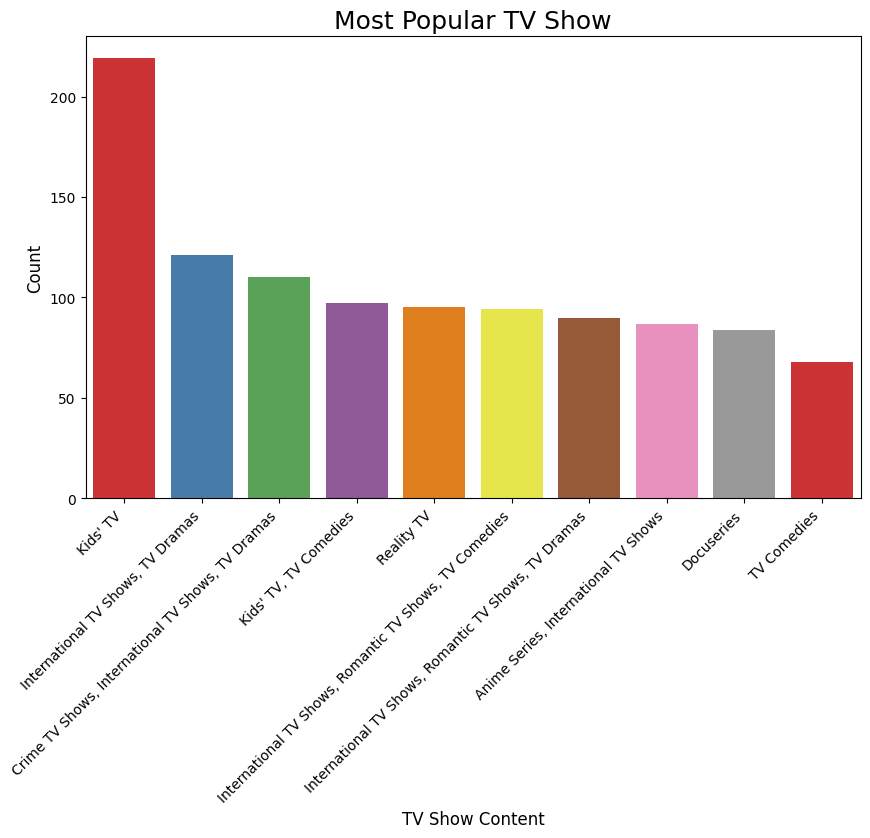

In [ ]:
# Top 10 TV Show in Netflix
plt.figure(figsize=(10,6))
sns.barplot(x=pouplar_TVshow.index, y = pouplar_TVshow.values, palette = 'Set1',legend=False)
plt.xticks(rotation = 45, ha = 'right')
plt.title('Most Popular TV Show', fontsize = 18)
plt.xlabel('TV Show Content',fontsize = 12)
plt.ylabel('Count',fontsize = 12)
plt.show()

<ipython-input-127-f8f8393b09a0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=popular_Movie.index, y = popular_Movie.values, palette = 'Set2',legend=False)


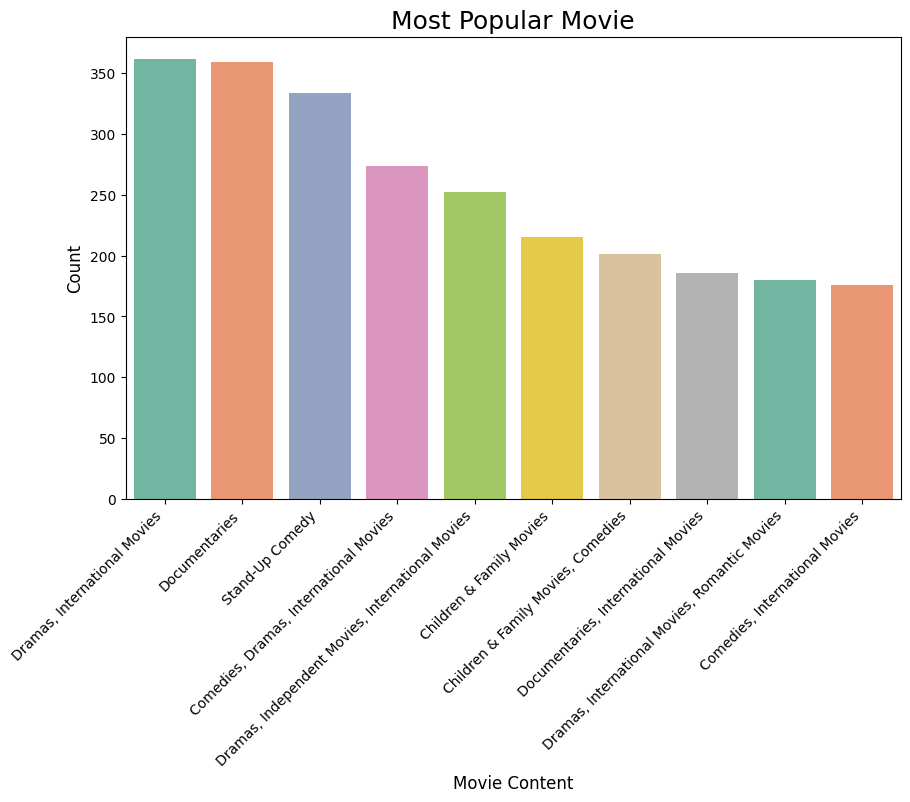

In [ ]:
# Top 10 Movie in Netflix
plt.figure(figsize=(10,6))
sns.barplot(x=popular_Movie.index, y = popular_Movie.values, palette = 'Set2',legend=False)
plt.xticks(rotation = 45, ha = 'right')
plt.title('Most Popular Movie', fontsize = 18)
plt.xlabel('Movie Content',fontsize = 12)
plt.ylabel('Count',fontsize = 12)
plt.show()

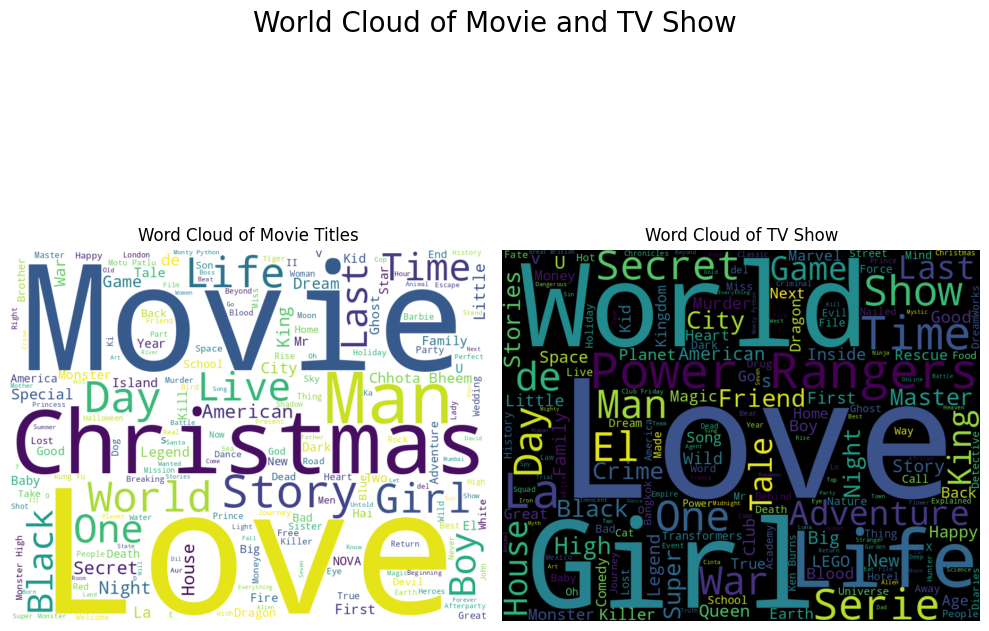

In [ ]:
# World Cloud of Movie and TV show
fig, axes=plt.subplots(1,2, figsize=(10, 8))

movie_titles = data[data['type'] == 'Movie']['title']
tv_show = data[data['type']=='TV Show']['title']

cloud_Movie = WordCloud(width =900, height = 700, background_color = 'white').generate(' '.join(movie_titles))
axes[0].imshow(cloud_Movie, interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title('Word Cloud of Movie Titles')

cloud_TVshow = WordCloud(width = 900, height = 700, background_color = 'black').generate(' '.join(tv_show))
axes[1].imshow(cloud_TVshow, interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title('Word Cloud of TV Show')
plt.suptitle('World Cloud of Movie and TV Show', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## Conclusion

This comprehensive analysis of Netflix's content library utilized Exploratory Data Analysis (EDA) alongside data preprocessing techniques like stemming and cleansing to ensure data quality. Cluster analysis identified distinct groupings within the content. Key findings include:

**Popular Genres:** International Movies emerged as the most popular genre, closely followed by Dramas.

**Content Trends:** Yearly releases of movies and TV shows were tracked, highlighting trends in content addition over time.

**Top Directors:** The top 10 directors with the most titles on Netflix were identified, showcasing influential creators.

**Ratings Analysis:** Content ratings were thoroughly analyzed and visualized, providing insights into viewer preferences.

**Geographical Insights:** Movie content is in high demand across all countries, with specific genres being most popular in different regions.

**Top Content:** The top 10 movie and TV show genres, along with the top 10 movies on Netflix, were highlighted.

**Visualization:** A word cloud illustrated the most frequent terms associated with Netflix's offerings, emphasizing popular themes and titles.


Overall, the analysis reveals significant trends in genre popularity, content distribution over time, influential directors, and regional preferences, providing valuable insights for content strategy and audience targeting on Netflix.